In [143]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [144]:
#reading cleaned dataset

df= pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv")

In [145]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [146]:
df.shape

(243, 15)

In [147]:
# removing day,month and year column

df.drop(["day","month","year"], axis=1,inplace=True)

In [148]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [149]:
df["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [150]:
#replacing not fire with 0 and fire with one in classes column

df["Classes"]= np.where(df["Classes"].str.contains("not fire"),0,1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [151]:
# checking the valuee counts of classes column again

df["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [152]:
# independent and dependent variable

X= df.drop("FWI", axis=1)
y= df["FWI"]

In [153]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [154]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [155]:
# train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.25, random_state=42)

In [156]:
X_train.shape , X_test.shape

((182, 11), (61, 11))

In [157]:
y_train.shape, y_test.shape

((182,), (61,))

# Feature Engineering

In [158]:
# correlation of independent features

X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

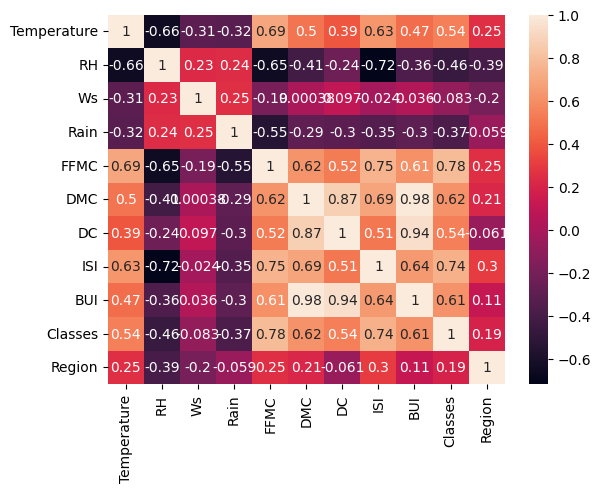

In [159]:
sns.heatmap(X_train.corr(), annot= True)

In [160]:
# checking for crrelation

def correlation(dataset,threshold):
    col_corr= set()
    corr_matrix= dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]>threshold):
                colname= corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr            

In [161]:
# correlated features after giving threshold as 85%

corr_features= correlation(X_train, 0.85)
corr_features

{'BUI', 'DC'}

In [162]:
# dropping the corelatd features from training and test dataset

X_train= X_train.drop(corr_features, axis=1)
X_test= X_test.drop(corr_features, axis=1)       

In [163]:
X_train.shape , X_test.shape

((182, 9), (61, 9))

# Feature Scaling or Standard Scaler

In [164]:
# using standardscaler

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.fit_transform(X_test)

In [165]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

# Box Plot to Understand Effect of Scaling

Text(0.5, 1.0, 'X_train after scaling')

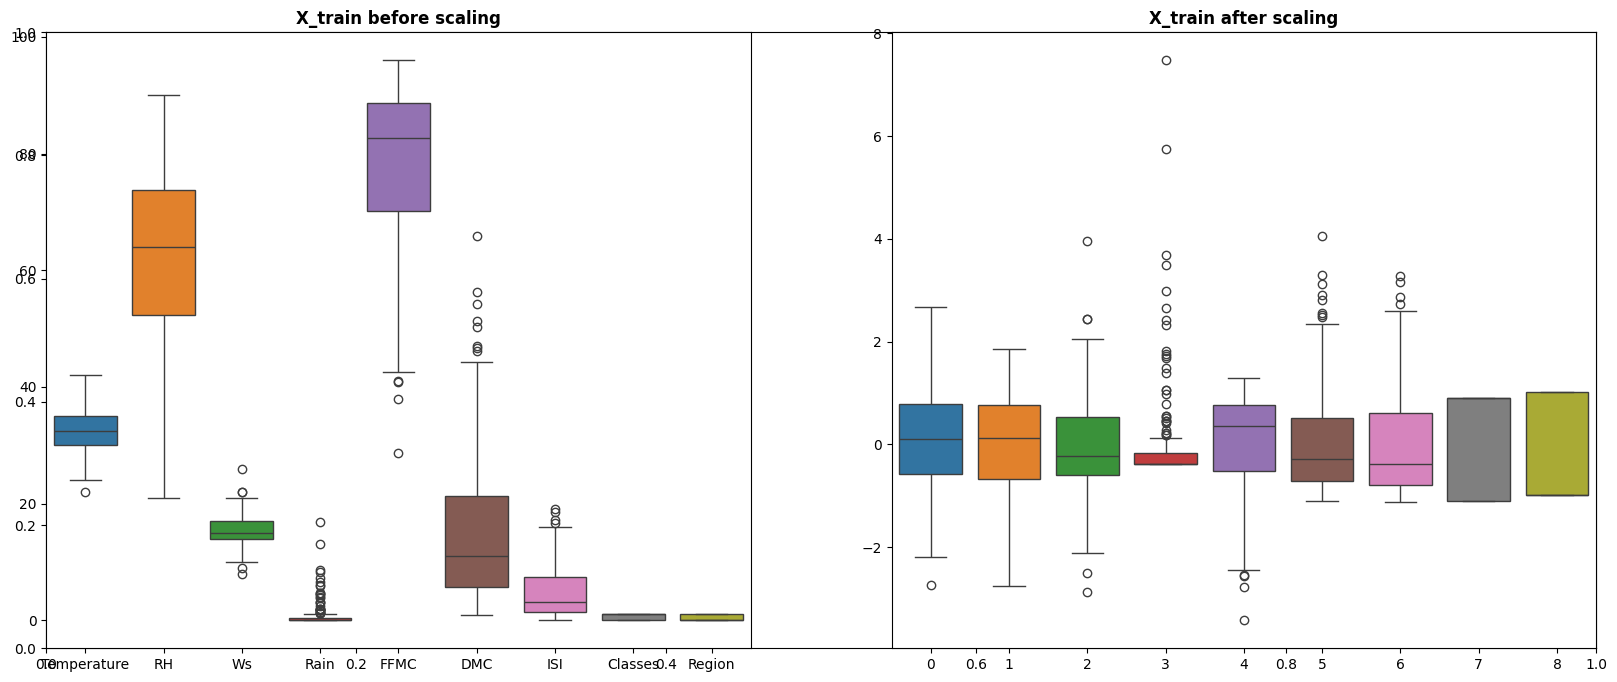

In [166]:
plt.subplots(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train before scaling", weight= "bold")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train after scaling", weight="bold")


# linear Regression Model

mean absolute :  0.9939450225331385
R2 Score is :  0.9607056657860652


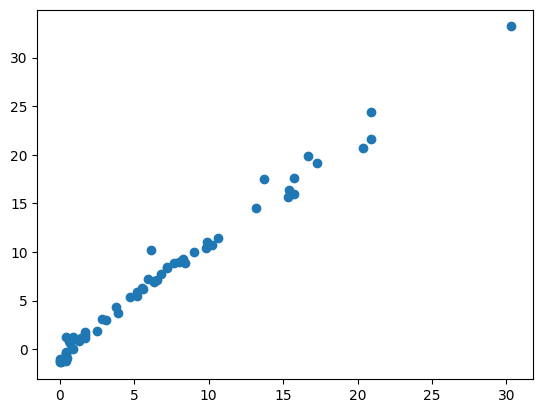

In [167]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
regressor= LinearRegression()
lrmodel= regressor.fit(X_train_scaled, y_train)
y_pred= lrmodel.predict(X_test_scaled)
mae= mean_absolute_error(y_test,y_pred)
score= r2_score(y_test,y_pred)
print("mean absolute : ", mae)
print("R2 Score is : ", score)
plt.scatter(y_test, y_pred)

# Lasso Regression

Mean absolute error :  0.9605020166901076
R2 Score :  0.9692970913627958


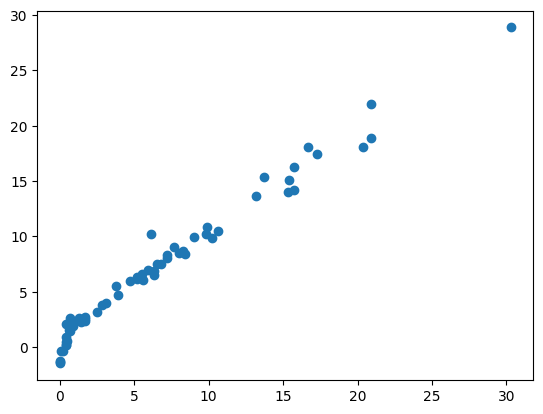

In [168]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
l1= Lasso()
lasso_model= l1.fit(X_train_scaled, y_train)
y_pred= lasso_model.predict(X_test_scaled)
mae= mean_absolute_error(y_test, y_pred)
Score= r2_score(y_test, y_pred)
print("Mean absolute error : ", mae)
print("R2 Score : ", Score)
plt.scatter(y_test, y_pred)

# Cross Validation Lasso

Mean absolute error :  0.9605020166901076
R2 Score :  0.9692970913627958


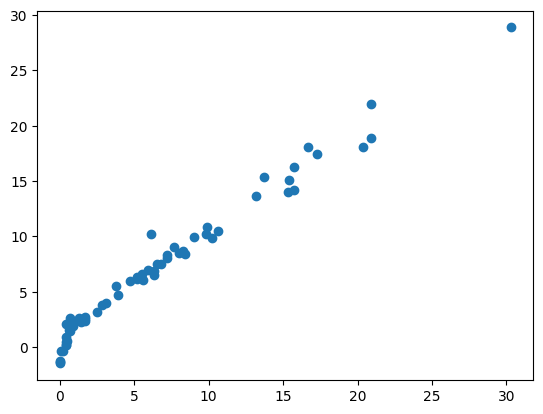

In [169]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lassocv= LassoCV(cv=5)
lassocv_model= lassocv.fit(X_train_scaled,y_train)
y_pred= lasso_model.predict(X_test_scaled)
mae= mean_absolute_error(y_test, y_pred)
Score= r2_score(y_test, y_pred)
print("Mean absolute error : ", mae)
print("R2 Score : ", Score)
plt.scatter(y_test, y_pred)


In [174]:
lassocv_model.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': False}

# Ridge Regression

Mean absolute error :  0.986207080288441
R2 Score :  0.9616458508455313


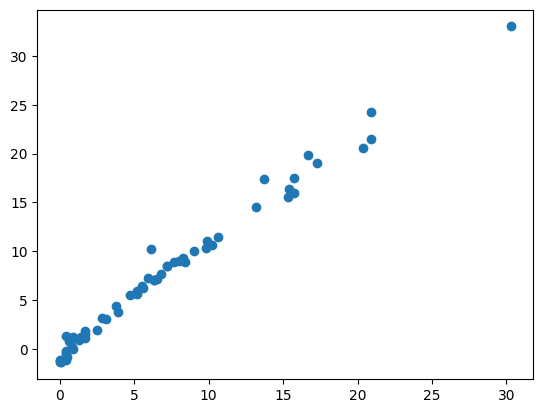

In [171]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge= Ridge()
ridge_model= ridge.fit(X_train_scaled,y_train)
y_pred= ridge_model.predict(X_test_scaled)
mae= mean_absolute_error(y_test, y_pred)
Score= r2_score(y_test, y_pred)
print("Mean absolute error : ", mae)
print("R2 Score : ", Score)
plt.scatter(y_test, y_pred)

# Ridge Cross Validation

Mean absolute error :  0.9862070802878357
R2 Score :  0.9616458508455673


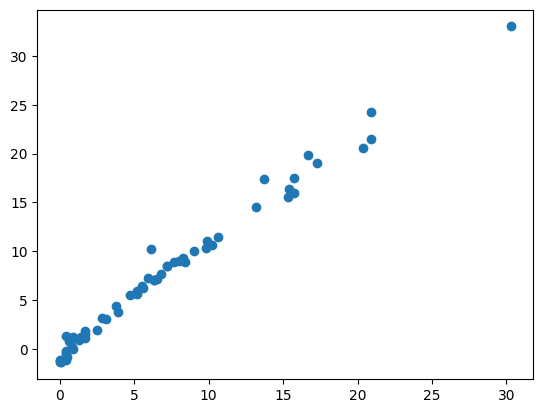

In [176]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridgecv= RidgeCV()
ridgecv_model= ridgecv.fit(X_train_scaled,y_train)
y_pred= ridgecv_model.predict(X_test_scaled)
mae= mean_absolute_error(y_test, y_pred)
Score= r2_score(y_test, y_pred)
print("Mean absolute error : ", mae)
print("R2 Score : ", Score)
plt.scatter(y_test, y_pred)

In [177]:
ridgecv_model.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': None,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

# ElasticNet Regression

Mean absolute error :  1.6511868133560939
R2 Score :  0.9081701979826986


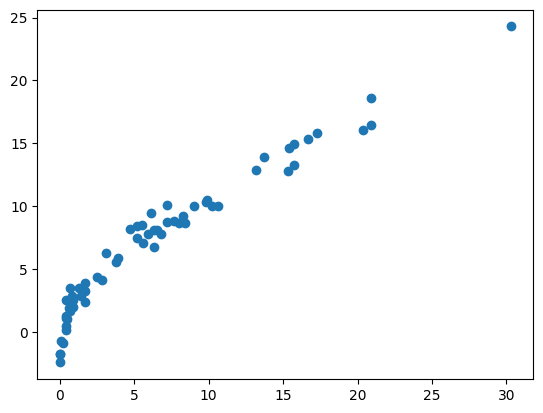

In [178]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elasticnet= ElasticNet()
elasticnet_model= elasticnet.fit(X_train_scaled,y_train)
y_pred= elasticnet_model.predict(X_test_scaled)
mae= mean_absolute_error(y_test, y_pred)
Score= r2_score(y_test, y_pred)
print("Mean absolute error : ", mae)
print("R2 Score : ", Score)
plt.scatter(y_test, y_pred)

# ElasticNet CV

Mean absolute error :  0.9658446127981588
R2 Score :  0.9635664846226284


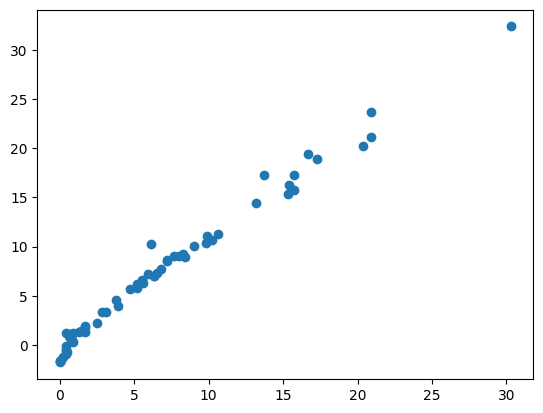

In [179]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elasticnetcv= ElasticNetCV()
elasticnetcv_model= elasticnetcv.fit(X_train_scaled,y_train)
y_pred= elasticnetcv_model.predict(X_test_scaled)
mae= mean_absolute_error(y_test, y_pred)
Score= r2_score(y_test, y_pred)
print("Mean absolute error : ", mae)
print("R2 Score : ", Score)
plt.scatter(y_test, y_pred)

# Pickle the Best Performing Regression Model and Prprocessing model - StandardScaler

In [181]:
import pickle
pickle.dump(ridge,open("ridge.pkl", "wb"))
pickle.dump(scaler,open("scaler.pkl", "wb"))